In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv('titanic_toy.csv')

In [3]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [4]:
df.isnull().mean()*100

,0
Age,19.865320
Fare,5.050505
Family,0.000000
Survived,0.000000


In [5]:
X = df.drop(columns=['Survived'])
y = df['Survived']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
X_train.shape, X_test.shape

((712, 3), (179, 3))

In [6]:
age_mean= X_train['Age'].mean()
fare_mean=X_train['Fare'].mean()
age_median= X_train['Age'].median()
fare_median=X_train['Fare'].median()

In [7]:
X_train['mean_age']= X_train['Age'].fillna(age_mean)
X_train['median_Age']= X_train['Age'].fillna(age_median)

X_train['mean_fare']= X_train['Fare'].fillna(age_mean)
X_train['median_fare']= X_train['Fare'].fillna(age_median)

In [9]:
X_train.sample(10)

,Age,Fare,Family,mean_age,median_Age,mean_fare,median_fare
620,27.0,14.4542,1,27.000000,27.00,14.454200,14.4542
314,43.0,26.2500,2,43.000000,43.00,26.250000,26.2500
323,22.0,29.0000,2,22.000000,22.00,29.000000,29.0000
769,32.0,8.3625,0,32.000000,32.00,8.362500,8.3625
623,21.0,7.8542,0,21.000000,21.00,7.854200,7.8542
252,62.0,26.5500,0,62.000000,62.00,26.550000,26.5500
869,4.0,11.1333,2,4.000000,4.00,11.133300,11.1333
526,50.0,10.5000,0,50.000000,50.00,10.500000,10.5000
633,NaN,NaN,0,29.785904,28.75,29.785904,28.7500
578,NaN,14.4583,1,29.785904,28.75,14.458300,14.4583


### After imputing mean/median, check how much the variance (spread) of the original column and imputed column vary. If the difference is too much, it is advisable to not follow this imputation technique.

In [11]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after median imputation: ', X_train['median_Age'].var())
print('Age Variance after mean imputation: ', X_train['mean_age'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after median imputation: ', X_train['median_fare'].var())
print('Fare Variance after mean imputation: ', X_train['mean_fare'].var())


'''
we imputing mean/median to age, variance differs too much. this is mainly because age has too many missing values (20% of total values were
missing.) Fare has around 5% missing values and there, imputing mean/median won't cost anything.
'''

Original Age variable variance:  204.3495133904614
Age Variance after median imputation:  161.9895663346054
Age Variance after mean imputation:  161.81262452718673
Original Fare variable variance:  2448.197913706318
Fare Variance after median imputation:  2324.9576136149317
Fare Variance after mean imputation:  2324.623996772905


In [13]:
X_train.cov()

,Age,Fare,Family,mean_age,median_Age,mean_fare,median_fare
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,66.383530,66.280487
Fare,70.719262,2448.197914,17.258917,55.603719,57.957599,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.146106,-5.112563,16.399278,16.404484
mean_age,204.349513,55.603719,-5.146106,161.812625,161.812625,52.565299,52.483705
median_Age,204.349513,57.957599,-5.112563,161.812625,161.989566,54.793876,54.710043
mean_fare,66.383530,2448.197914,16.399278,52.565299,54.793876,2324.623997,2324.765012
median_fare,66.280487,2448.197914,16.404484,52.483705,54.710043,2324.765012,2324.957614


In [12]:
X_train.corr()

,Age,Fare,Family,mean_age,median_Age,mean_fare,median_fare
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.089754,0.089604
Fare,0.092644,1.000000,0.208268,0.088069,0.091757,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.244610,-0.242883,0.205660,0.205710
mean_age,1.000000,0.088069,-0.244610,1.000000,0.999454,0.085707,0.085568
median_Age,1.000000,0.091757,-0.242883,0.999454,1.000000,0.089292,0.089149
mean_fare,0.089754,1.000000,0.205660,0.085707,0.089292,1.000000,0.999989
median_fare,0.089604,1.000000,0.205710,0.085568,0.089149,0.999989,1.000000


<Axes: >

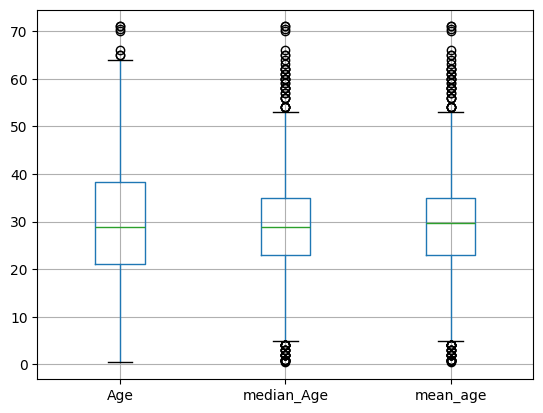

In [16]:
'''
as the variance decreased significantly in both cases (imputing mean/median), the std dev also decreased, decreasing the [-3std, +3std] range
leading to the increase in outliers.
'''
X_train[['Age', 'median_Age', 'mean_age']].boxplot()

<Axes: >

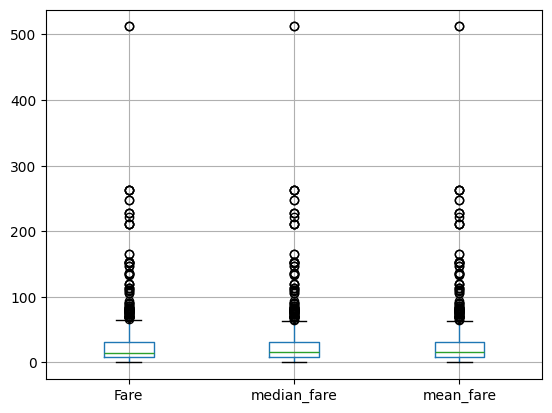

In [18]:
X_train[['Fare', 'median_fare', 'mean_fare']].boxplot()

### Generally, it is advised, not to use the Pandas for imputation. Instead use scikit learn for production ready code, and also it allows you to implement different column imputations, that too of different strategies, simultaneously, using the column transformer.

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

trf = ColumnTransformer([
    ('imputer1',SimpleImputer(strategy='median'),['Age']),
    ('imputer2',SimpleImputer(strategy='mean'),['Fare'])
],remainder='passthrough')

In [20]:
trf.fit_transform(X_train)

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])

In [21]:
trf.transform(X_test)

array([[ 42.        ,  26.2875    ,   0.        ],
       [ 21.        ,   8.05      ,   0.        ],
       [ 24.        ,  65.        ,   3.        ],
       [ 28.        ,  56.4958    ,   0.        ],
       [ 17.        ,   7.925     ,   6.        ],
       [ 30.        ,   7.8958    ,   0.        ],
       [ 80.        ,  30.        ,   0.        ],
       [ 25.        ,   7.25      ,   0.        ],
       [ 50.        , 133.65      ,   2.        ],
       [ 25.        ,  26.        ,   1.        ],
       [ 35.        ,  26.        ,   0.        ],
       [ 35.        ,  90.        ,   1.        ],
       [ 55.        ,  16.        ,   0.        ],
       [ 28.75      ,  56.4958    ,   0.        ],
       [ 28.75      ,  56.4958    ,   0.        ],
       [ 19.        ,   7.8542    ,   1.        ],
       [ 28.75      ,  15.2458    ,   2.        ],
       [ 49.        ,   0.        ,   0.        ],
       [ 18.        ,  32.61759689,   1.        ],
       [ 65.        ,   7.75   